In [1]:
# series temporales: poder predictivo poco
# hacer streamlit: visualization potente 

# ideas: 
# feature engineering, crear campos: año de convocatoria, diff entre 1a lista y nota final, porcentaje de bajada, ciudad, comunidad, 
# numero de listas o convocatorias que han habido por universidad, diferencia de notas entre años

# limpieza: quitar columnas de sobre 10, concatenar todas las particiones de años, nombres de universidades, columnas, asegurar fechas correctas, 
# todas las notas con el mismo numero de decimales

# modelo: predecir la nota (a través de un rango, con una tolerancia que defina) para el año 2022-2023 estudiando los datos de años anteriores. 
# Predecir también la probabilidad de que entres en una universidad u otra en funcion de la nota que hayas sacado en una convocatoria anterior
# adicionalmente, tener en cuenta que la metodologia del examen cambió por el COVID

# visualizacion: mapa geografico de españa, con un mapa de calor por la probabilidad o por la nota mas alta y mas baja
# visualizacion de datos historicos a traves de un grafico de linea
# crecimiento con los años
# front end que se pueda filtrar por universidad, convocatoria o nota final, 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os

In [3]:
current_directory = os.getcwd()
raw_data_directory = current_directory + '/raw_data'
raw_data_directory

'/Users/miguel/repos/Prediction_Medicine_Selectivity_Scores/raw_data'

# Importing data

In [4]:
# lo del df_name no tiene sentido si luego no lo puedo llamar

In [5]:
# input raw data from different years (2010-2021)
initial_year = 2010
last_year = 2021
next_year = initial_year + 1
num_years = last_year - initial_year + 1
list_of_dfs = []
list_of_directories = []
# format example: df_2010_2011 = pd.read_csv(raw_data_directory + '/Notas de corte de Medicina 2010_2011 - Hoja 1.csv', decimal = ',')

for i in range(num_years):
    df_name = 'df' + '_' + str(initial_year) + '_' + str(next_year)
    directory = raw_data_directory + '/Notas de corte de Medicina ' + str(initial_year) + '_' + str(next_year) + ' - Hoja 1.csv'
    list_of_dfs.append(df_name)
    list_of_directories.append(directory)
    
    list_of_dfs[i] = pd.read_csv(list_of_directories[i], decimal = ',')
    
    initial_year += 1
    next_year += 1

In [6]:
# before appending all dfs, we create a column with the year, to keep track of which df the data is coming from
initial_year = 2010

for i in range(num_years):
    list_of_dfs[i]['year'] = initial_year + i

In [7]:
dfs_unified = pd.DataFrame()

In [8]:
for i in range(num_years):
    dfs_unified = dfs_unified.append(list_of_dfs[i])

In [9]:
# check the append has been done correctly: check the number of rows is the sum of all of the dfs

total_number_of_rows = 0

for i in range(num_years):
    total_number_of_rows = total_number_of_rows + len(list_of_dfs[i])

if total_number_of_rows != dfs_unified.shape[0]:
    sys.exit()
else:
    print('append has been done correctly')

append has been done correctly


# Data Cleaning

## Check for duplicates

In [10]:
if dfs_unified[dfs_unified.duplicated() == True].shape[0] != 0:
    dfs_unified.drop_duplicates()
else:
    print('There are no duplicates')

There are no duplicates


## Create new unique columns out of data that we already had

In [11]:
def drop_columns_containing_text(df, text):
    '''
    drop columns that contain a certain string/text
    '''
    df = df[df.columns.drop(list(df.filter(regex=text)))]
    return df

In [12]:
dfs_unified = drop_columns_containing_text(dfs_unified, 'Sobre')

In [13]:
# to keep track of raw columns, to afterwards drop them
dfs_unified_raw_columns = dfs_unified.columns.tolist()
# 'year' was created before and is not a raw column
dfs_unified_raw_columns.remove('year')
#dfs_unified_columns

In [14]:
# tiene sentido copiar solo not null data y no toda????????

In [15]:
def copy_data(new_col, old_col):
    '''
    copy not null data from one column to another
    '''
    dfs_unified[new_col] = np.where(dfs_unified[old_col].notnull(), dfs_unified[old_col], dfs_unified[new_col])

In [16]:
dfs_unified['university'] = ''
copy_data('university', 'Notas de corte de Medicina')
copy_data('university', 'Universidad')
copy_data('university', 'Facultad de Medicina')

dfs_unified['date_last_admission'] = ''
copy_data('date_last_admission', 'Fecha de última admisión')
copy_data('date_last_admission', 'Última fecha de admisión \n(Fecha de la nota final)')

dfs_unified['final_grade'] = ''
copy_data('final_grade', 'Nota de corte final de Medicina')
copy_data('final_grade', 'Nota de corte final')
copy_data('final_grade', 'Nota de corte actual')


for i in range(1, 24):
    dfs_unified[str(i) + '_list'] = ''
    copy_data(str(i) + '_list', str(i) + 'ª Lista')

copy_data('19_list', '19ª lista')
copy_data('20_list', '20ª lista')

In [17]:
# drop all old columns
dfs_unified = dfs_unified.drop(dfs_unified_raw_columns, axis=1)

# reset index
dfs_unified = dfs_unified.reset_index()

In [18]:
dfs_unified[~dfs_unified['university'].str.contains('U', na=False)]

,index,year,university,date_last_admission,final_grade,1_list,2_list,3_list,4_list,5_list,...,14_list,15_list,16_list,17_list,18_list,19_list,20_list,21_list,22_list,23_list
31,31,2010,,,,,,,,,...,,,,,,,,,,
33,33,2010,"** Publicada nota de 11,257 en la CiuG, el 7/9/10","Y RECTIFICADA POR 11,410; 8/9/10",,,,,,,...,,,,,,,,,,
98,32,2012,Nota promedio,,12.017,,,,,,...,,,,,,,,,,
99,33,2012,Desviación típica,,0.22,,,,,,...,,,,,,,,,,
132,32,2013,Nota promedio,,12.082,,,,,,...,,,,,,,,,,
133,33,2013,Desviación típica,,0.213,,,,,,...,,,,,,,,,,
166,32,2014,Nota promedio,,12.268,,,,,,...,,,,,,,,,,
167,33,2014,Desviación típica,,0.213,,,,,,...,,,,,,,,,,
200,32,2015,Nota promedio,,12.422,12.605,12.517,12.48,12.455,,...,,,,,,,,,,
201,33,2015,Desviación típica,,0.188,0.201,0.177,0.175,0.173,,...,,,,,,,,,,


In [19]:
dfs_unified = dfs_unified[dfs_unified['university'].str.contains('U', na=False)]

In [20]:
dfs_unified = dfs_unified[~dfs_unified['university'].str.contains('Sobre la Universidad de Santiago:', na=False)]

In [21]:
dfs_unified.columns

Index(['index', 'year', 'university', 'date_last_admission', 'final_grade',
       '1_list', '2_list', '3_list', '4_list', '5_list', '6_list', '7_list',
       '8_list', '9_list', '10_list', '11_list', '12_list', '13_list',
       '14_list', '15_list', '16_list', '17_list', '18_list', '19_list',
       '20_list', '21_list', '22_list', '23_list'],
      dtype='object')

In [22]:
dfs_unified_columns = dfs_unified.columns.tolist()[1:]

num_columns = len(dfs_unified_columns)

for i in range(num_columns):
    dfs_unified[dfs_unified_columns[i]].replace({'': np.nan}, inplace=True)

In [23]:
# quality check: essential columns don't have nulls

nulls_date_last_admission = dfs_unified[dfs_unified['date_last_admission'].isnull()].shape[0]
nulls_1_list = dfs_unified[dfs_unified['1_list'].isnull()].shape[0]
nulls_final_grade = dfs_unified[dfs_unified['final_grade'].isnull()].shape[0]
nulls_university = dfs_unified[dfs_unified['university'].isnull()].shape[0]

if nulls_date_last_admission or nulls_1_list or nulls_final_grade or nulls_university != 0:
    sys.exit()
else:
    print('column date_last_admission has', nulls_date_last_admission, 'null rows')
    print('column 1_list has', nulls_1_list, 'null rows')
    print('column final_grade has', nulls_final_grade, 'null rows')
    print('column university has', nulls_university, 'null rows')

column date_last_admission has 0 null rows
column 1_list has 0 null rows
column final_grade has 0 null rows
column university has 0 null rows


## Create consistent University names across years

In [24]:
dfs_unified['university'] = dfs_unified['university'].str.lower()

In [25]:
last_year = 2021
dfs_unified[dfs_unified['year'] == last_year]['university'].values

array(['universidad complutense de madrid', 'universidad de sevilla',
       'universidad de murcia', 'universidad de granada',
       'u. autónoma de madrid', 'universidad de málaga',
       'universidad de córdoba', 'universidad de cádiz',
       'u. miguel hernández (s. juan de alicante)',
       'u. de c-la mancha (campus c.real)', 'universidad de alcalá',
       'universidad de valladolid', 'urjc - campus alcorcón',
       'u. de c-la mancha (campus albacete)',
       'u. de extremadura (badajoz)', 'universidad pública de navarra',
       'universidad de valencia', 'universidad jaume i',
       'u. de zaragoza (campus zaragoza)',
       'universidad de barcelona-clínico', 'universidad de la laguna',
       'universidad de las palmas', 'universidad de salamanca',
       'u. de zaragoza (campus huesca)', 'u. de santiago de compostela',
       'universidad de oviedo', 'u. de cantabria (santander)',
       'universidad de barcelona-bellvitge',
       'universidad del país vasco (lejon

In [26]:
list_of_uni_names_2021 = dfs_unified[dfs_unified['year'] == last_year]['university'].tolist()
num_of_uni_names_2021 = len(list_of_uni_names_2021)
print('There are', num_of_uni_names_2021, 'universities in 2021')

dfs_unified_list_uni = list(dfs_unified['university'].unique())
num_of_uni_names_dataset = len(dfs_unified_list_uni)
print('There are a total of', num_of_uni_names_dataset, 'universities in our dataset')

diff_uni_names = num_of_uni_names_dataset - num_of_uni_names_2021
print('This means there are a total of', diff_uni_names, 'universities that have a different name than the ones in our 2021 data, and need to be mapped')

There are 35 universities in 2021
There are a total of 48 universities in our dataset
This means there are a total of 13 universities that have a different name than the ones in our 2021 data, and need to be mapped


In [27]:
# we create a list with the universities that have different name

list_not_matched = []

for i in dfs_unified_list_uni:
    if i not in list_of_uni_names_2021:
        list_not_matched.append(i)
    else:
        continue


if len(list_not_matched) != diff_uni_names:
    sys.exit()
else:
    print('list of not matched created successfully')

list_not_matched

list of not matched created successfully


['universidad de zaragoza - campus de huesca',
 'universidad de cantabria (santander)',
 'universidad de santiago de compostela',
 'universidad de extremadura (badajoz)',
 'universidad pompeu fabra (barcelona)',
 'universidad de barcelona',
 'universidad de zaragoza - campus de zaragoza',
 'universidad de clm- campus de ciudad real',
 'universidad de clm- campus de albacete',
 'universidad miguel hernández (san juan de alicante)',
 'universidad rey juan carlos - campus de alcorcón',
 'universidad autónoma de madrid',
 'universidad de jaume i']

### Sequence Matcher

In [28]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [29]:
df1 = pd.DataFrame({
    "not_matched_uni": list_not_matched
})

df2 = pd.DataFrame({
    "list_of_uni_names_2021": list_of_uni_names_2021
})

df3 = pd.MultiIndex.from_product(
    [df1["not_matched_uni"], df2["list_of_uni_names_2021"]], names=["not_matched_uni", "list_of_uni_names_2021"]
).to_frame(index=False)

In [30]:
df3['ratio'] = ''

for i in range(len(df3['not_matched_uni'])):
    df3['ratio'][i] = similar(df3['not_matched_uni'][i], df3['list_of_uni_names_2021'][i])

df3['not_matched_uni'].nunique()

13

In [31]:
df4 = df3.groupby('not_matched_uni')['ratio'].max().reset_index()

df5 = pd.merge(df4,df3,on='not_matched_uni',how='left')
df5 = df5[df5['ratio_x'] == df5['ratio_y']]
df5

,not_matched_uni,ratio_x,list_of_uni_names_2021,ratio_y
31,universidad autónoma de madrid,0.825397,universidad autónoma de barcelona,0.825397
54,universidad de barcelona,0.857143,universidad de barcelona-clínico,0.857143
96,universidad de cantabria (santander),0.825397,u. de cantabria (santander),0.825397
134,universidad de clm- campus de albacete,0.676056,universidad de las islas baleares,0.676056
140,universidad de clm- campus de ciudad real,0.648649,universidad complutense de madrid,0.648649
189,universidad de extremadura (badajoz),0.825397,u. de extremadura (badajoz),0.825397
227,universidad de jaume i,0.926829,universidad jaume i,0.926829
269,universidad de santiago de compostela,0.830769,u. de santiago de compostela,0.830769
303,universidad de zaragoza - campus de huesca,0.750000,u. de zaragoza (campus huesca),0.75
333,universidad de zaragoza - campus de zaragoza,0.763158,u. de zaragoza (campus zaragoza),0.763158


In [32]:
# hacerlo con str.contains, crear funcion

In [33]:
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de cantabria (santander)'), 'u. de cantabria (santander)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de extremadura (badajoz)'), 'u. de extremadura (badajoz)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de jaume i'), 'universidad jaume i', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de zaragoza - campus de huesca'), 'u. de zaragoza (campus huesca)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de santiago de compostela'), 'u. de santiago de compostela', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de zaragoza - campus de zaragoza'), 'u. de zaragoza (campus zaragoza)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad miguel hernández (san juan de alicante)'), 'u. miguel hernández (s. juan de alicante)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad pompeu fabra (barcelona)'), 'u. pompeu fabra (barcelona)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de santiago de compostela'), 'u. de santiago de compostela', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad rey juan carlos - campus de alcorcón'), 'urjc - campus alcorcón', dfs_unified['university'])


dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad autónoma de madrid'), 'u. autónoma de madrid', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de barcelona'), 'universidad de barcelona-clínico', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de clm- campus de albacete'), 'u. de c-la mancha (campus albacete)', dfs_unified['university'])
dfs_unified['university'] = np.where((dfs_unified['university'] == 'universidad de clm- campus de ciudad real'), 'u. de c-la mancha (campus c.real)', dfs_unified['university'])

In [34]:
# quality check: make sure all university names are mapped with 2021 names

dfs_unified_list_uni = list(dfs_unified['university'].unique())

list_not_matched = []

for i in dfs_unified_list_uni:
    if i not in list_of_uni_names_2021:
        list_not_matched.append(i)
    else:
        continue

# checking length of not matched
if len(list_not_matched) != 0:
    sys.exit()
else:
    print('all university names are consistent with 2021')

# another way of checking this could be by analyzing the overall length and unique names
if dfs_unified['university'].nunique() != len(list_of_uni_names_2021):
    sys.exit()
else:
    print('all university names are consistent with 2021')

all university names are consistent with 2021
all university names are consistent with 2021


## Convert columns with numbers to floats

In [35]:
# to convert to float, we can't have commas or spaces, as this function '.astype(float)' will give back an error

In [36]:
# float to 2 decimals?? some have 3

In [37]:
for i in range(1,24):
    try:
        dfs_unified[str(i) + '_list'] = dfs_unified[str(i) + '_list'].astype(float)
    except:
        dfs_unified[str(i) + '_list'] = np.where((dfs_unified[str(i) + '_list'].str.contains(',', na=False)), dfs_unified[str(i) + '_list'].replace({',': '.'}, inplace=True), dfs_unified[str(i) + '_list'])
        dfs_unified[str(i) + '_list'] = np.where((dfs_unified[str(i) + '_list'] == ''), dfs_unified[str(i) + '_list'].replace({'': np.nan}, inplace=True), dfs_unified[str(i) + '_list'])
        dfs_unified[str(i) + '_list'] = np.where((dfs_unified[str(i) + '_list'] == 's/datos'), dfs_unified[str(i) + '_list'].replace({'s/datos': np.nan}, inplace=True), dfs_unified[str(i) + '_list'])

In [38]:
# check date_last_admission format

In [39]:
jj

NameError: name 'jj' is not defined

In [ ]:
# Export data to be used on Tableau

In [ ]:
file_name = 'output/exported_data.csv'
dfs_unified.to_csv(file_name, index = False, header=True)

# Data Visualization

In [ ]:
complutense = dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(complutense['year'], complutense['1_list'])
# Setting the x-axis to 1-10
# and y-axis to 1-15
plt.axis([2009, 2022, 11.00, 14.00])
plt.show()

In [ ]:
!pip install streamlit

In [ ]:
import streamlit as st

In [ ]:
st.title('My title')

In [ ]:
# end data visualization

# Feature Engineering

In [ ]:
# creat city column - PASAR A MAS ABAJO

In [ ]:
# first: bigger cities in case two names appear
list_of_cities = ['madrid', 'zaragoza', 'barcelona', 'sevilla', 'valencia', 'murcia', 'granada','málaga', 'córdoba', 'cádiz', 'alicante', 'albacete', \
    'valladolid', 'badajoz', 'gerona', 'lérida', 'reus', 'navarra', 'santander', 'oviedo', \
    'santiago de compostela', 'salamanca', 'país vasco', 'salamanca', 'navarra', 'las palmas', 'la laguna', 'alcalá', 'ciudad real', 'huesca']

In [ ]:
num_cities = len(list_of_cities)

In [ ]:
i=0
dfs_unified['city'] = ''
while i < num_cities:
    dfs_unified['city'] = np.where(dfs_unified['university'].str.contains(list_of_cities[i], na=False), list_of_cities[i], dfs_unified['city'])
    i +=1

In [ ]:
dfs_unified['city'].replace({'': np.nan}, inplace=True)

In [ ]:
dfs_unified[dfs_unified['city'].isnull()]

In [ ]:
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('alcorcón', na=False), 'madrid', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('c.real', na=False), 'ciudad real', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('jaume', na=False), 'castellon de la plana', dfs_unified['city'])
dfs_unified['city'] = np.where(dfs_unified['university'].str.contains('islas baleares', na=False), 'palma de mallorca', dfs_unified['city'])

In [ ]:
dfs_unified[dfs_unified['city'].isnull()]

In [ ]:
num_columns = len(dfs_unified_columns)

while i < num_columns:
    dfs_unified[dfs_unified_columns[i]].replace({'': np.nan}, inplace=True)
    i += 1

In [ ]:
dfs_unified['place'] = np.where(dfs_unified['university'].str.contains('universidad de', na=False), dfs_unified['university'].str.strip().str[15:], dfs_unified['place'])
dfs_unified['place'] = np.where(dfs_unified['university'].str.contains('u. de', na=False), dfs_unified['university'].str.strip().str[6:], dfs_unified['place'])

In [ ]:
dfs_unified['university'].str.split(' ')

In [ ]:
#dfs_unified[dfs_unified['year'] == 2021]

In [ ]:
u_de = dfs_unified[dfs_unified['university'].str.contains('u. de', na=False)]
dfs_unified['place'] = u_de['university'].str.strip().str[6:]

In [ ]:
dfs_unified[~dfs_unified['university'].str.contains('Un', na=False)]

In [ ]:
dfs_unified['place']

In [ ]:
dfs_unified['city']

In [ ]:
dfs_unified['campus']

In [ ]:
dfs_unified['campus']

In [ ]:
# new university column
# university + city + campus

In [ ]:
# nombres de universidades
# duplicados
# notas de mayor a menor

In [ ]:
dfs_unified[dfs_unified['university'] == 'Sobre la Universidad de Santiago:']

In [ ]:
# año-univeristy y ver cuales no aparecen en el año anterior
dfs_unified['year_university'] = (dfs_unified['year']).astype(str) + '_' + dfs_unified['university']

In [ ]:
uni_year_grouped = dfs_unified.groupby(['year'])['university'].count()
uni_year_grouped

# Model

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
#list_of_uni_names_2021

In [42]:
# change in test format due to covid
dfs_unified['covid_format_change'] = ''
dfs_unified['covid_format_change'] = np.where((dfs_unified['year'] >= 2020), float(1), dfs_unified['covid_format_change'])
dfs_unified['covid_format_change'] = np.where((dfs_unified['year'] < 2020), float(0), dfs_unified['covid_format_change'])

In [101]:
# growth columns
dfs_unified['growth_1_list'] = dfs_unified.groupby('university')['1_list'].pct_change()

dfs_unified['growth_final_grade'] = dfs_unified.groupby('university')['final_grade'].pct_change()


In [102]:
dfs_unified_columns = dfs_unified.columns.tolist()[1:]

num_columns = len(dfs_unified_columns)

for i in range(num_columns):
    dfs_unified[dfs_unified_columns[i]].replace({np.nan: 0}, inplace=True)

### Example for Universidad Complutense de Madrid

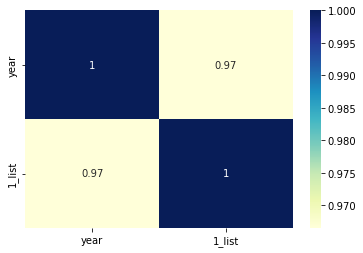

In [56]:
# let's check the correlation between the two variables
sns.heatmap(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid'][['year', '1_list']].corr(), cmap='YlGnBu', annot=True)
plt.show()

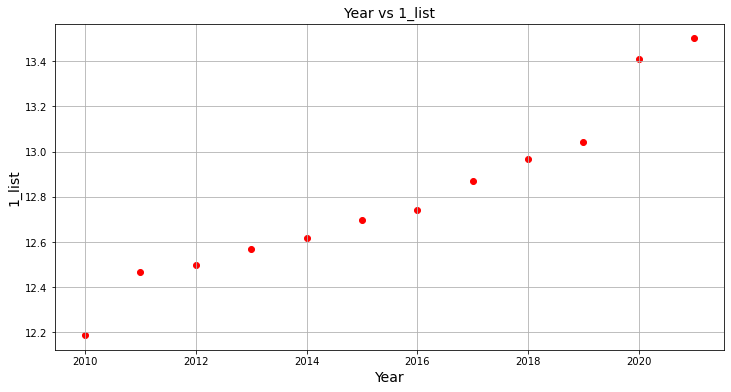

In [57]:
plt.figure(figsize=(12,6))
plt.scatter(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['year'], dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list'], color='red')
plt.title('Year vs 1_list', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('1_list', fontsize = 14)
plt.grid(True)
plt.show()

In [ ]:
#

In [60]:
# Create a Linear regression

lr = LinearRegression()
X = dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid'][['year', 'covid_format_change', 'growth_1_list']]
y = dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid'][['1_list']]

lr.fit(X, y)

LinearRegression()

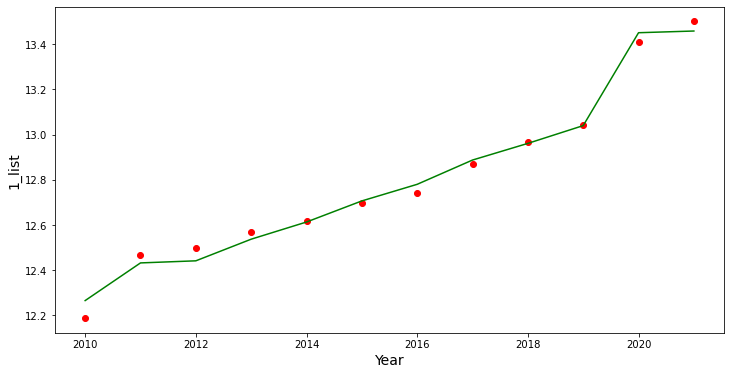

In [61]:
# generate model prediction for all years in dataset
y_predict = lr.predict(X)

# visualize the predicted score as a line on the test set
plt.figure(figsize=(12,6))
plt.scatter(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['year'], dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list'], color='red')
plt.plot(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['year'], y_predict, color='g')
plt.xlabel('Year', fontsize = 14)
plt.ylabel('1_list', fontsize = 14)
plt.show()

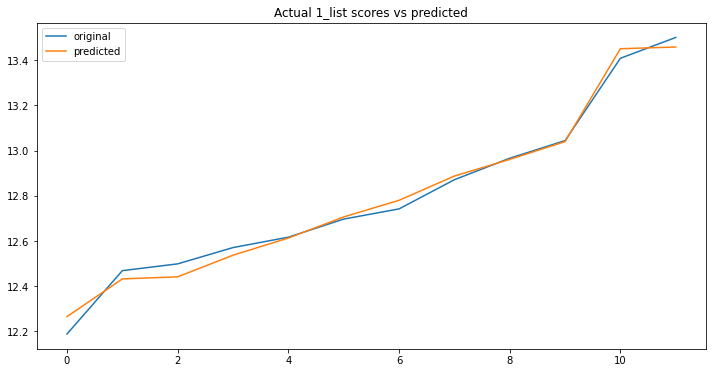

In [62]:
# compare model predictions vs actual values
plt.figure(figsize=(12,6))
x_ax = range(len(dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list']))
plt.plot(x_ax, dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['1_list'], label='original')
plt.plot(x_ax, y_predict, label='predicted')
plt.title('Actual 1_list scores vs predicted')
plt.legend()
plt.show()

## Evaluate model

In [63]:
# evaluate model
from sklearn.metrics import r2_score

r2_score(y, y_predict)

# HACER
# There are three primary metrics used to evaluate linear models. These are: Mean absolute error (MAE), Mean squared error (MSE), or Root mean squared error (RMSE).

0.9894809791230086

## Predict next year scores

In [80]:
# predict 1_list for a given year

# supposing the same growth as last year

complu_1_list_score = float(lr.predict([[2022, 1.0, dfs_unified[dfs_unified['university'] == 'universidad complutense de madrid']['growth_1_list'][-1:].mean()]]))
complu_1_list_score

13.541302334899285

## Save 2022 predicted scores

In [81]:
uni_names = {'university': list_of_uni_names_2021}
pred_y_df = pd.DataFrame(uni_names, columns=['university'])
pred_y_df['year'] = 2022
pred_y_df['1_list'] = ''
pred_y_df['1_list'] = np.where(pred_y_df['university'] == 'universidad complutense de madrid', complu_1_list_score, pred_y_df['1_list'])
pred_y_df

,university,year,1_list
0,universidad complutense de madrid,2022,13.541302
1,universidad de sevilla,2022,
2,universidad de murcia,2022,
3,universidad de granada,2022,
4,u. autónoma de madrid,2022,
5,universidad de málaga,2022,
6,universidad de córdoba,2022,
7,universidad de cádiz,2022,
8,u. miguel hernández (s. juan de alicante),2022,
9,u. de c-la mancha (campus c.real),2022,


In [82]:
# we have done this for 1 university, let's automate it for the rest

In [114]:
def predict_and_save_scores(year, covid_format_change, university, convocatory):
    '''
    explicar
    '''

    lr = LinearRegression()
    X = dfs_unified[dfs_unified['university'] == university][['year', 'covid_format_change', 'growth_' + convocatory]]
    y = dfs_unified[dfs_unified['university'] == university][[convocatory]]

    # train
    lr.fit(X, y)
    
    # predict, supposing same growth as last year
    pred_y_df[convocatory] = np.where(pred_y_df['university'] == university, float(lr.predict([[year, covid_format_change, dfs_unified[dfs_unified['university'] == university]['growth_' + convocatory][-1:].mean()]])), pred_y_df[convocatory])

In [115]:
for uni in list_of_uni_names_2021:
    predict_and_save_scores(2022, 1.0, uni, '1_list')

pred_y_df['final_grade'] = ''
for uni in list_of_uni_names_2021:
    predict_and_save_scores(2022, 1.0, uni, 'final_grade')

In [116]:
pred_y_df

,university,year,1_list,final_grade
0,universidad complutense de madrid,2022,13.541302,13.482731
1,universidad de sevilla,2022,13.566611,13.448085
2,universidad de murcia,2022,13.548674,13.346465
3,universidad de granada,2022,13.583027,13.363036
4,u. autónoma de madrid,2022,13.548856,13.438171
5,universidad de málaga,2022,13.495228,13.345928
6,universidad de córdoba,2022,13.459792,13.323212
7,universidad de cádiz,2022,13.45875,13.31451
8,u. miguel hernández (s. juan de alicante),2022,13.430225,13.191103
9,u. de c-la mancha (campus c.real),2022,13.453345,13.196382


In [ ]:
# probar con train y test
# PROBAR OTROS MODELOS - LM, GLM